## ***Problem Statement***


***Business Context***

System failure is a common issue across the manufacturing industry, where a variety of machines and equipment are used. In most cases, it becomes important to be able to predict machine failures by analyzing system data and taking preventive measures to be able to tackle them. This is known as predictive maintenance and with the rising availability of data and computational resources, the use of such data-driven, proactive maintenance methods has resulted in several benefits like minimized downtime of the equipment, minimized cost associated with spares and supplies, etc.

AutoMobi Engineering Pvt. Ltd is an auto component manufacturing company. The manufacturing facility of AutoMobi consists of numerous products machined on several CNC (Computer Numerical Controlled) machines. In an attempt to transition to a data-driven maintenance process, the company had set up sensors in various locations to collect data regarding the various parameters involved in the manufacturing process. Initially, they want to try it in an injector nozzle manufacturing shop where they are manufacturing fuel injector nozzles for automobile engines using various manufacturing processes (like turning, drilling, etc). The company has been collecting data on an hourly basis from these sensors and aims to build ML-based solutions using the data to optimize cost, improve failure predictability, and minimize the downtime of equipment.


***Objective***

- Predictive maintenance is a proactive approach to equipment management that uses machine learning to predict equipment failures before they happen.
- This project builds a classification model to determine whether a machine is likely to fail, enabling cost savings and reduced downtime.

***Data Description***
    
The data contains the different attributes of machines and health. The detailed data dictionary is given below.

***Data Dictionary***

- UDI: Unique identifier ranging from 1 to 10000
- Type: The type of product consisting of low(60% of all products), medium(30%), and high(10%) quality corresponding to L, M, and H
- Air temperature: Ambient temperature (in the machine shop) measured in Kelvin
- Process Temperature: Tool tip temperature measured in Kelvin
- Rotational Speed: Rotational speed of the machine spindle measured in revolutions per minute (rpm)
- Torque: Torque acting on the machine spindle measured in Newton meter (Nm)
- Tool wear: Tool wear measured in micrometers (During the manufacturing process, continuous rubbing of the tool on the workpiece leads to the wearing of the tool material. The tool wear is measured as the amount of wear on the cutting face of the tool measured in micrometers)
- Failure: 0-No failure, 1-Failure

## IMPORT NECESARY LIBRARIES

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## READ DATASET

In [83]:
df0=pd.read_csv("Predictive_Maintenance_Case_Study.csv")

In [84]:
df=df0.copy()
df.sample()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
1362,1363,L,298.6,328.925926,1517,41.2,64,0


## DATA OVERVIEW

In [85]:
df.shape

(10000, 8)

In [86]:
df.Type.value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [87]:
#This is a imbalanced dataset
df.Failure.value_counts()

Failure
0    9661
1     339
Name: count, dtype: int64

In [88]:
cols=["Type", "Failure"]

for i in cols:
    df[i]=df[i].astype("category")

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   UDI                  10000 non-null  int64   
 1   Type                 10000 non-null  category
 2   Air temperature      10000 non-null  float64 
 3   Process temperature  10000 non-null  float64 
 4   Rotational speed     10000 non-null  int64   
 5   Torque               10000 non-null  float64 
 6   Tool wear            10000 non-null  int64   
 7   Failure              10000 non-null  category
dtypes: category(2), float64(3), int64(3)
memory usage: 488.7 KB


In [90]:
df.describe()

,UDI,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,328.946519,1538.776100,39.986910,107.951000
std,2886.89568,2.000259,5.495312,179.284096,9.968934,63.654147
min,1.00000,295.300000,313.000000,1168.000000,3.800000,0.000000
25%,2500.75000,298.300000,324.481481,1423.000000,33.200000,53.000000
50%,5000.50000,300.100000,329.296296,1503.000000,40.100000,108.000000
75%,7500.25000,301.500000,333.000000,1612.000000,46.800000,162.000000
max,10000.00000,304.500000,343.000000,2886.000000,76.600000,253.000000


In [91]:
df.describe(include="category")

,Type,Failure
count,10000,10000
unique,3,2
top,L,0
freq,6000,9661


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   UDI                  10000 non-null  int64   
 1   Type                 10000 non-null  category
 2   Air temperature      10000 non-null  float64 
 3   Process temperature  10000 non-null  float64 
 4   Rotational speed     10000 non-null  int64   
 5   Torque               10000 non-null  float64 
 6   Tool wear            10000 non-null  int64   
 7   Failure              10000 non-null  category
dtypes: category(2), float64(3), int64(3)
memory usage: 488.7 KB


In [93]:
df.isnull().sum()

UDI                    0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Failure                0
dtype: int64

In [94]:
df.nunique()

UDI                    10000
Type                       3
Air temperature           93
Process temperature       82
Rotational speed         941
Torque                   577
Tool wear                246
Failure                    2
dtype: int64

## EDA

In [95]:
def uni_continous(data, feature):
    sns.histplot(data=data,x=feature,kde=True)
    plt.xticks(rotation=90,ha=("right"))
    plt.show()
    sns.boxplot(data=data,x=feature)

def uni_categorical(data,feature):
    sns.countplot(data=data,x=feature, palette = 'Greys')
    plt.xticks(rotation=90,ha="right")

def bi_count(data, feature, target):
    sns.countplot(data=data,x=feature,hue=target,palette= "Greys")
    plt.xticks(rotation = 90, ha="right")
    plt.show()

def bi_bar(data,feature,target):
    sns.barplot(data= data,x= feature, y=target,palette="Greys")

def bi_scatter(data,feature,target):
    sns.scatterplot(data=data,x=feature,y=target)

def bi_line(data,feature,target):
    sns.lineplot(data=data,x=feature,y=target,errorbar= None)

In [96]:
df.sample()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
7168,7169,L,300.3,330.037037,1704,29.5,0,0


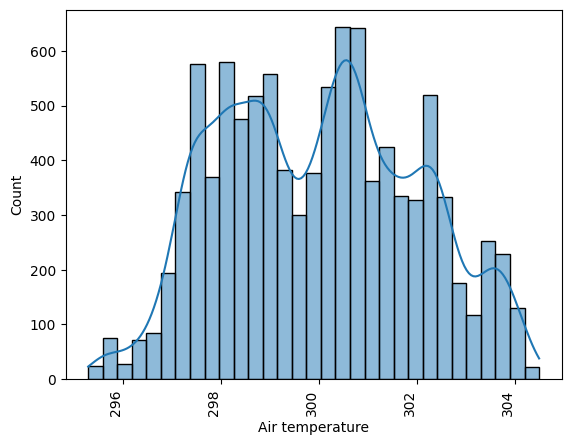

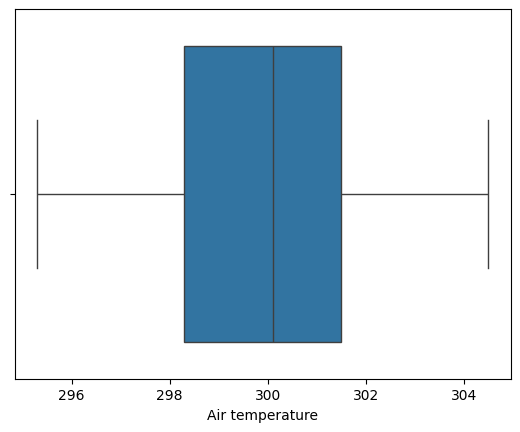

In [97]:
uni_continous(df, "Air temperature")

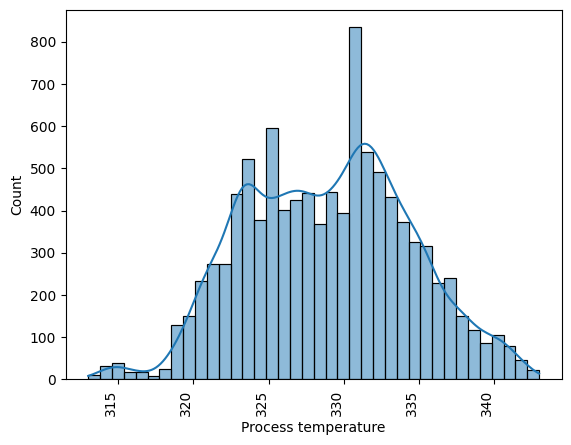

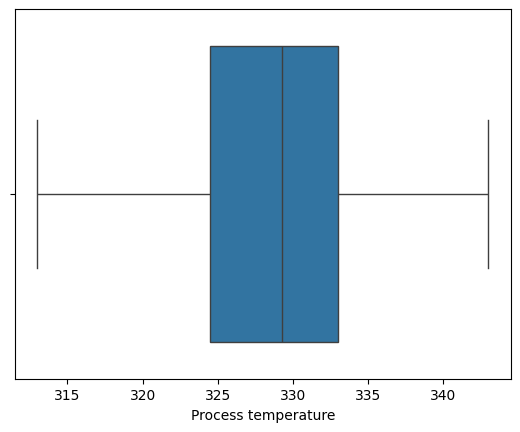

In [98]:
uni_continous(df, "Process temperature")

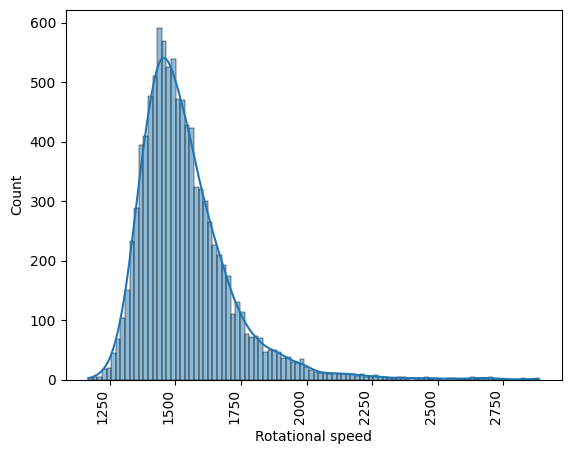

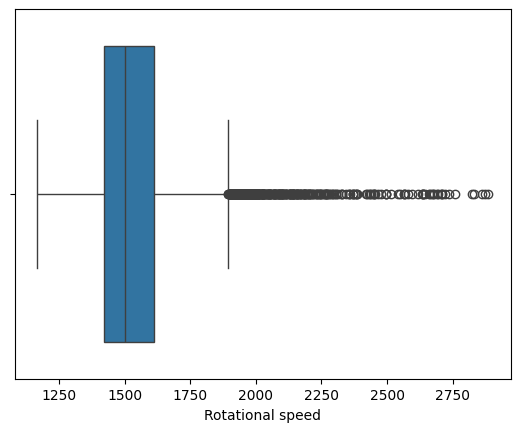

In [99]:
uni_continous(df, "Rotational speed")

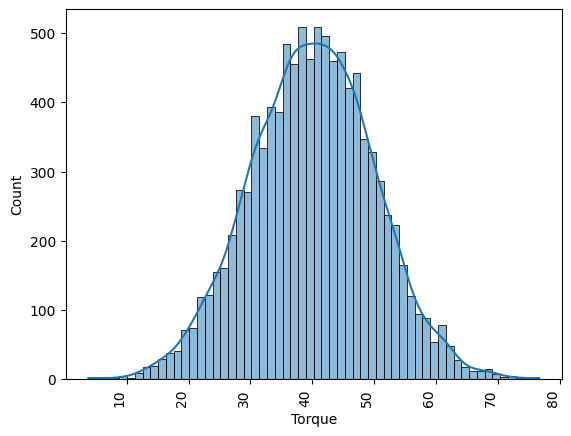

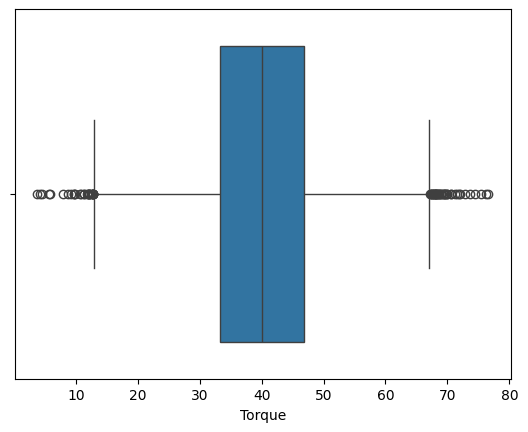

In [100]:
uni_continous(df, "Torque")

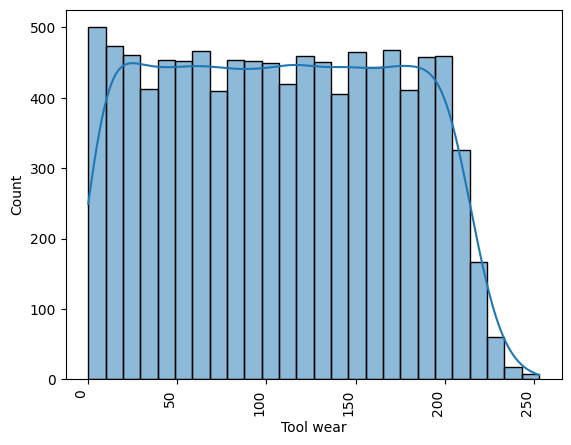

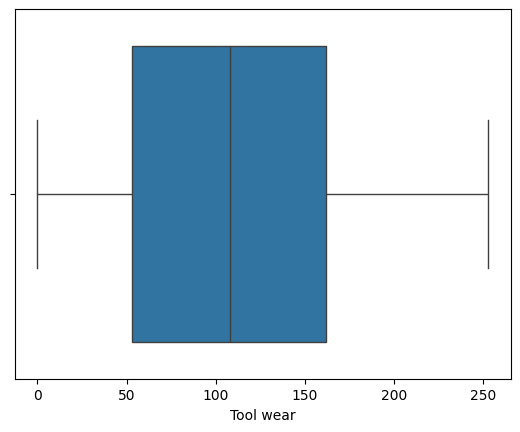

In [101]:
uni_continous(df, "Tool wear")

C:\Users\USER\AppData\Local\Temp\ipykernel_15508\4204314245.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=feature, palette = 'Greys')


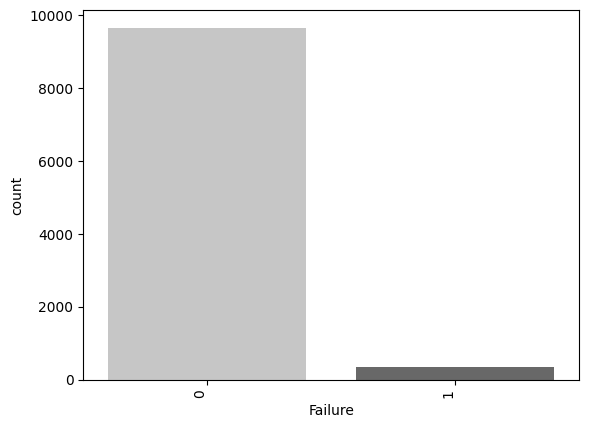

In [102]:
 uni_categorical(df,"Failure")

C:\Users\USER\AppData\Local\Temp\ipykernel_15508\4204314245.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=feature, palette = 'Greys')


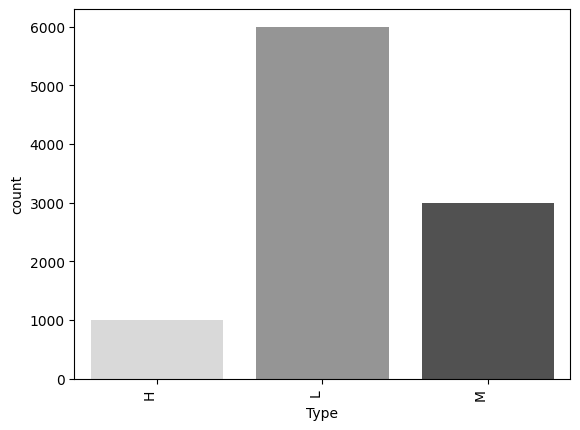

In [103]:
 uni_categorical(df,"Type")

BIVARIATE ANALYSIS

In [104]:
df.sample()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
4858,4859,L,303.7,337.444444,1349,51.0,105,0


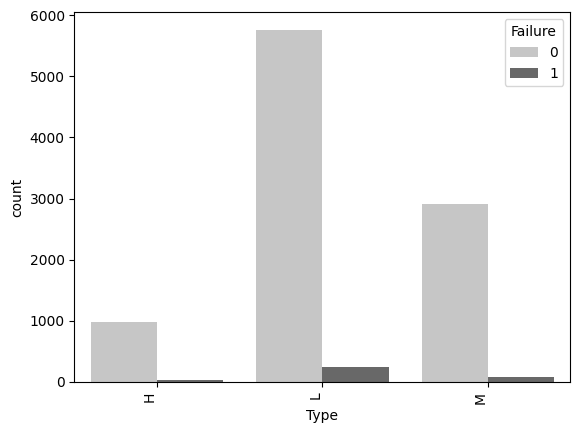

In [105]:
 bi_count(df,"Type","Failure")

C:\Users\USER\AppData\Local\Temp\ipykernel_15508\4204314245.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data,x= feature, y=target,palette="Greys")


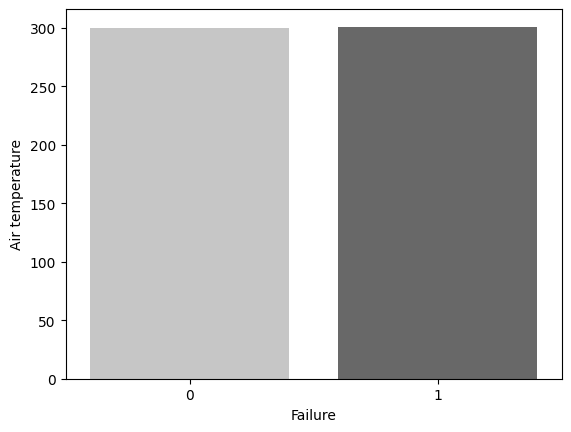

In [106]:
bi_bar(df,"Failure","Air temperature")

C:\Users\USER\AppData\Local\Temp\ipykernel_15508\4204314245.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data,x= feature, y=target,palette="Greys")


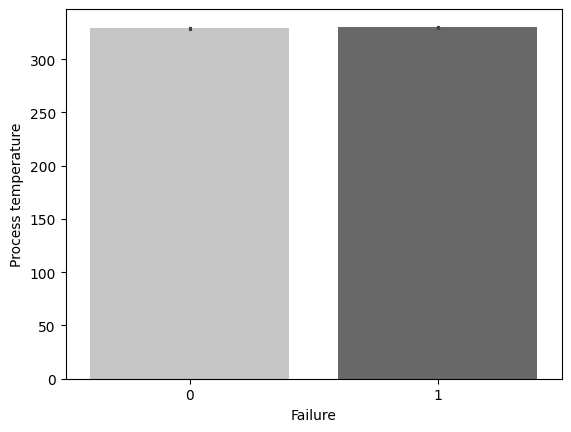

In [107]:
bi_bar(df,"Failure","Process temperature")

C:\Users\USER\AppData\Local\Temp\ipykernel_15508\4204314245.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data,x= feature, y=target,palette="Greys")


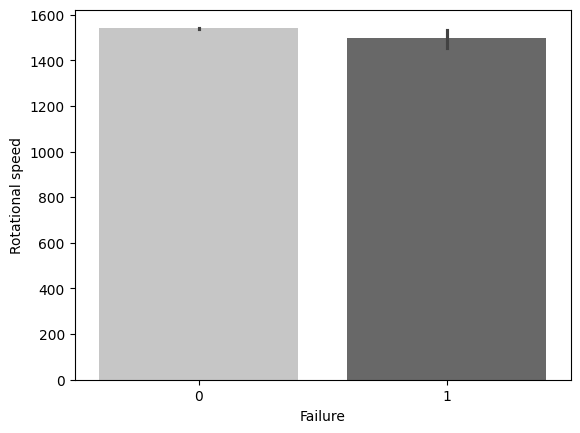

In [108]:
bi_bar(df,"Failure","Rotational speed")

C:\Users\USER\AppData\Local\Temp\ipykernel_15508\4204314245.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data,x= feature, y=target,palette="Greys")


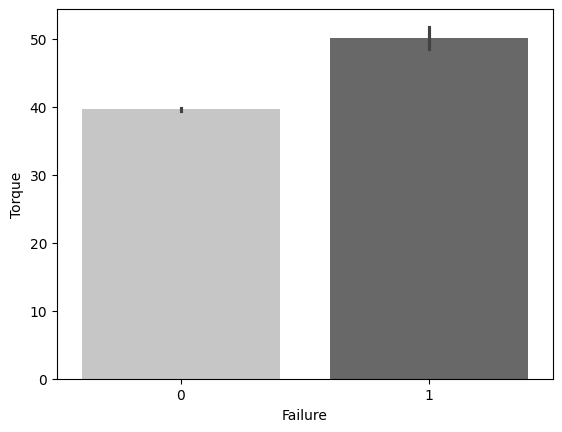

In [109]:
bi_bar(df,"Failure","Torque")

C:\Users\USER\AppData\Local\Temp\ipykernel_15508\4204314245.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= data,x= feature, y=target,palette="Greys")


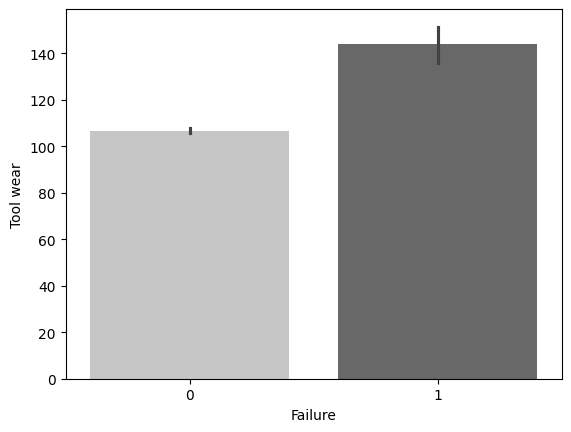

In [110]:
bi_bar(df,"Failure","Tool wear")

In [111]:
Corr=df.corr(numeric_only= True)

<Axes: >

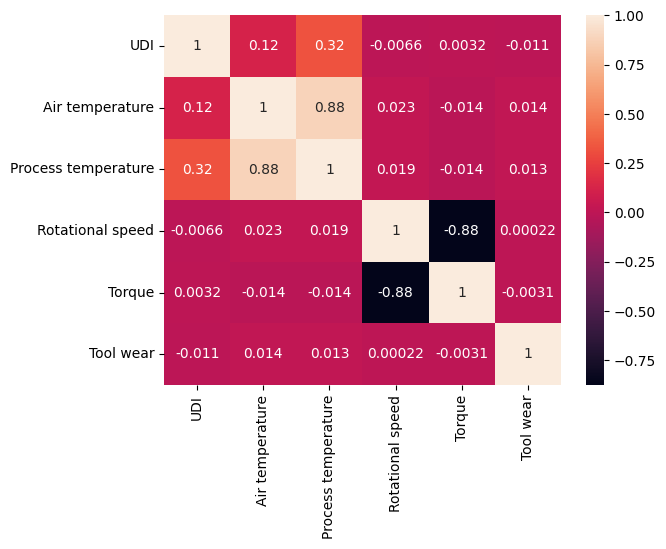

In [112]:
sns.heatmap(Corr, annot=True)

## FEATURE ENGINEERING

In [113]:
df.sample()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
4733,4734,L,303.3,334.851852,1484,44.6,223,0


In [114]:
df["total_temp"] = df["Air temperature"] + df["Process temperature"]
df.drop(["Air temperature","Process temperature"],axis=1, inplace=True)

## DATA PREPROCESSING

ENCODING


In [115]:
df.sample()

,UDI,Type,Rotational speed,Torque,Tool wear,Failure,total_temp
1752,1753,L,1492,37.2,178,0,618.237037


In [116]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("--------------------------------------")

UDI
[    1     2     3 ...  9998  9999 10000]
--------------------------------------
Type
['M', 'L', 'H']
Categories (3, object): ['H', 'L', 'M']
--------------------------------------
Rotational speed
[1551 1408 1498 1433 1425 1558 1527 1667 1741 1782 1423 1339 1742 2035
 1542 1311 1410 1306 1632 1375 1450 1581 1758 1561 1861 1512 1811 1439
 1693 1798 1419 1665 1559 1452 1379 1350 1362 1368 1372 1472 1489 1843
 1418 1412 2861 1383 1497 1565 1691 1477 1513 1661 1378 1393 1592 1829
 1812 1523 1394 1679 1466 1924 1369 1601 1461 1455 1398 1402 1445 1453
 1469 1422 1804 1436 1544 1487 1753 1830 1727 1622 1351 1575 1750 1529
 1852 1991 1555 1441 1591 1621 1572 1872 1499 1486 1680 1431 1564 1599
 1707 1467 1310 1546 1560 1329 1413 1587 1473 1737 1430 1711 1420 1297
 1449 1268 1511 1778 1407 1391 1612 1515 1463 1584 1850 1528 1987 1495
 1478 1471 1282 1586 1468 1440 1733 1458 1318 1610 1462 1382 1618 1988
 1304 1475 1824 1342 1485 1446 1301 1606 1539 1666 1678 2678 1432 1588
 1609 1636 1490 1

In [117]:
#using the for loop for encoding
type_new=[]

for i in df["Type"]:
    if i=="L":
        type_new.append(0)
    elif i=="M":
        type_new.append(1)
    else:
        type_new.append(2)
    

In [118]:
#replacing and storing the value of the encoded feature into the original column
df["Type"]= type_new
df.sample(5)

,UDI,Type,Rotational speed,Torque,Tool wear,Failure,total_temp
788,789,1,1440,46.3,64,0,618.788889
9503,9504,1,1551,44.8,18,0,629.237037
591,592,2,1525,41.7,235,0,623.833333
3908,3909,0,1633,36.4,114,0,635.670370
9391,9392,2,2071,18.5,144,0,619.859259


In [119]:
#dropping the UDI FEATURE BECAUSE IT IS NOT SO RELEVANT IN OUR MACHINE LEARNING
df=df.drop("UDI",axis=1)

SCALING

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
#create an instance of the class
mms=MinMaxScaler()

In [122]:
#using the mms to normalize the feature since it is a skewed distribution
df["Rotational speed"]= mms.fit_transform(df[["Rotational speed"]])
df.sample()

,Type,Rotational speed,Torque,Tool wear,Failure,total_temp
3935,1,0.034342,68.2,187,1,637.451852


In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
ss= StandardScaler()

In [125]:
cols=["total_temp","Torque","Tool wear"]

for i in cols:
    df[i]= ss.fit_transform(df[[i]])

In [126]:
df.sample(5)

,Type,Rotational speed,Torque,Tool wear,Failure,total_temp
9844,2,0.183935,-0.299637,-1.256085,0,-0.691926
6852,2,0.252619,-0.730998,-1.397481,0,0.741175
3054,2,0.101281,0.874068,-0.627657,0,-0.330738
8995,0,0.178114,0.372485,0.849147,0,-1.399612
6996,1,0.263679,-0.801220,1.194782,0,0.368842


## MODEL BUILDING

### MODEL EVALUATION CRITERION

0 - No Failure
1 - Failure
Model can make wrong prediction as:
- FP= Model can predict a non failure as failure
- FN= Model can predict a failure as non failure

- company would want to reduce the false negatives and we will use the recall metrics.

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [128]:
# Split data to X and y i.e,definning the featureand the target
X= df.drop("Failure", axis=1)
y= df.Failure

In [129]:
# split data to train and test data
X_train,X_test,y_train,y_test= train_test_split(X,y, train_size=0.8)

In [130]:
#  train modelV
model= LogisticRegression()

In [131]:
model.fit(X_train,y_train)

LogisticRegression()

In [132]:
model.score(X_test,y_test)

0.971

In [133]:
df["Failure"].value_counts()

Failure
0    9661
1     339
Name: count, dtype: int64

In [134]:
y_test.value_counts()

Failure
0    1937
1      63
Name: count, dtype: int64

- This is an imbalanced dataset

## EVALUATION

In [135]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score,classification_report,recall_score

In [136]:
y_pred = model.predict(X_test)

In [137]:
# evaluatiion using confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1937,    0],
       [  58,    5]])

<Axes: >

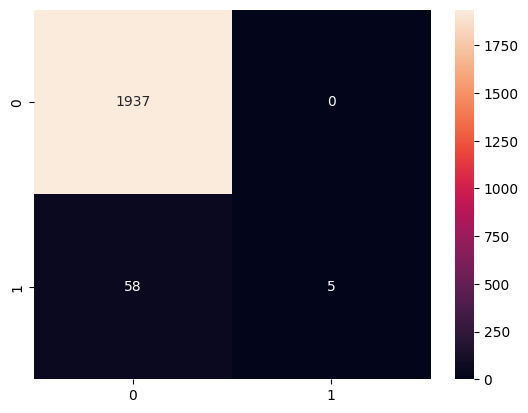

In [138]:
sns.heatmap(cm,annot =True,fmt="")

In [139]:
precision_score(y_test,y_pred)

1.0

In [140]:
recall_score(y_test,y_pred)

0.07936507936507936

In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1937
           1       1.00      0.08      0.15        63

    accuracy                           0.97      2000
   macro avg       0.99      0.54      0.57      2000
weighted avg       0.97      0.97      0.96      2000



#### DEFAULT DECISION TREE CLASSIFIER

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
X=df.drop("Failure",axis=1)
y=df.Failure

In [144]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [145]:
dt_model.score(X_test,y_test)

0.968

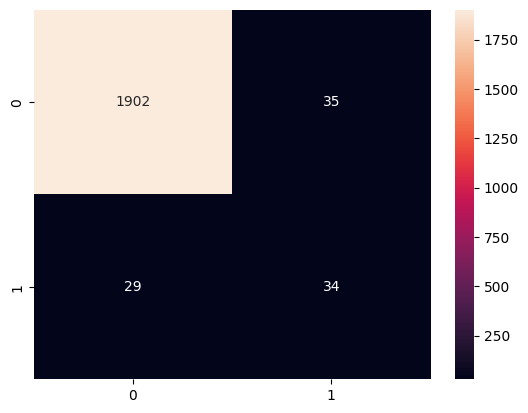

0.5396825396825397

In [146]:
y_pred=dt_model.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, fmt="")
plt.show()

recall_score(y_test,y_pred)

CREATE A FUCNTION FOR EVALUATION

In [147]:
def model_performance(model,predictors,target):
    pred = model.predict(predictors)
    acc = accuracy_score(target,pred)
    recall=recall_score(target,pred)
    precision = precision_score(target,pred)
    f1=f1_score(target,pred)

    df_perf = pd.DataFrame({
        "Accuracy":acc,
        "Recall": recall,
        "Precision": precision,
        "F1 Score":f1}, index = [0])
    return df_perf

def confusion(model,predictors,target):
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot = True, fmt="")
    plt.xlabel("Actual values")
    plt.ylabel("predicted values")

In [148]:
print("perfomance on Training Dataset")
model_performance(dt_model,X_train,y_train)

perfomance on Training Dataset


,Accuracy,Recall,Precision,F1 Score
0,1.0,1.0,1.0,1.0


In [149]:
print("performance on Testing Dataset")
model_performance(dt_model,X_test,y_test)

performance on Testing Dataset


,Accuracy,Recall,Precision,F1 Score
0,0.968,0.539683,0.492754,0.515152


perfomance on Training Dataset


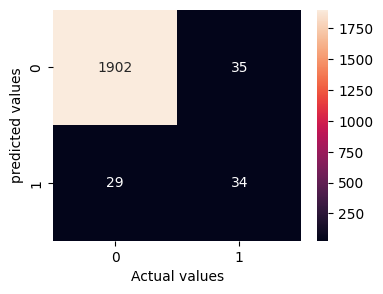

In [150]:
print("perfomance on Training Dataset")
confusion(dt_model,X_train,y_train)

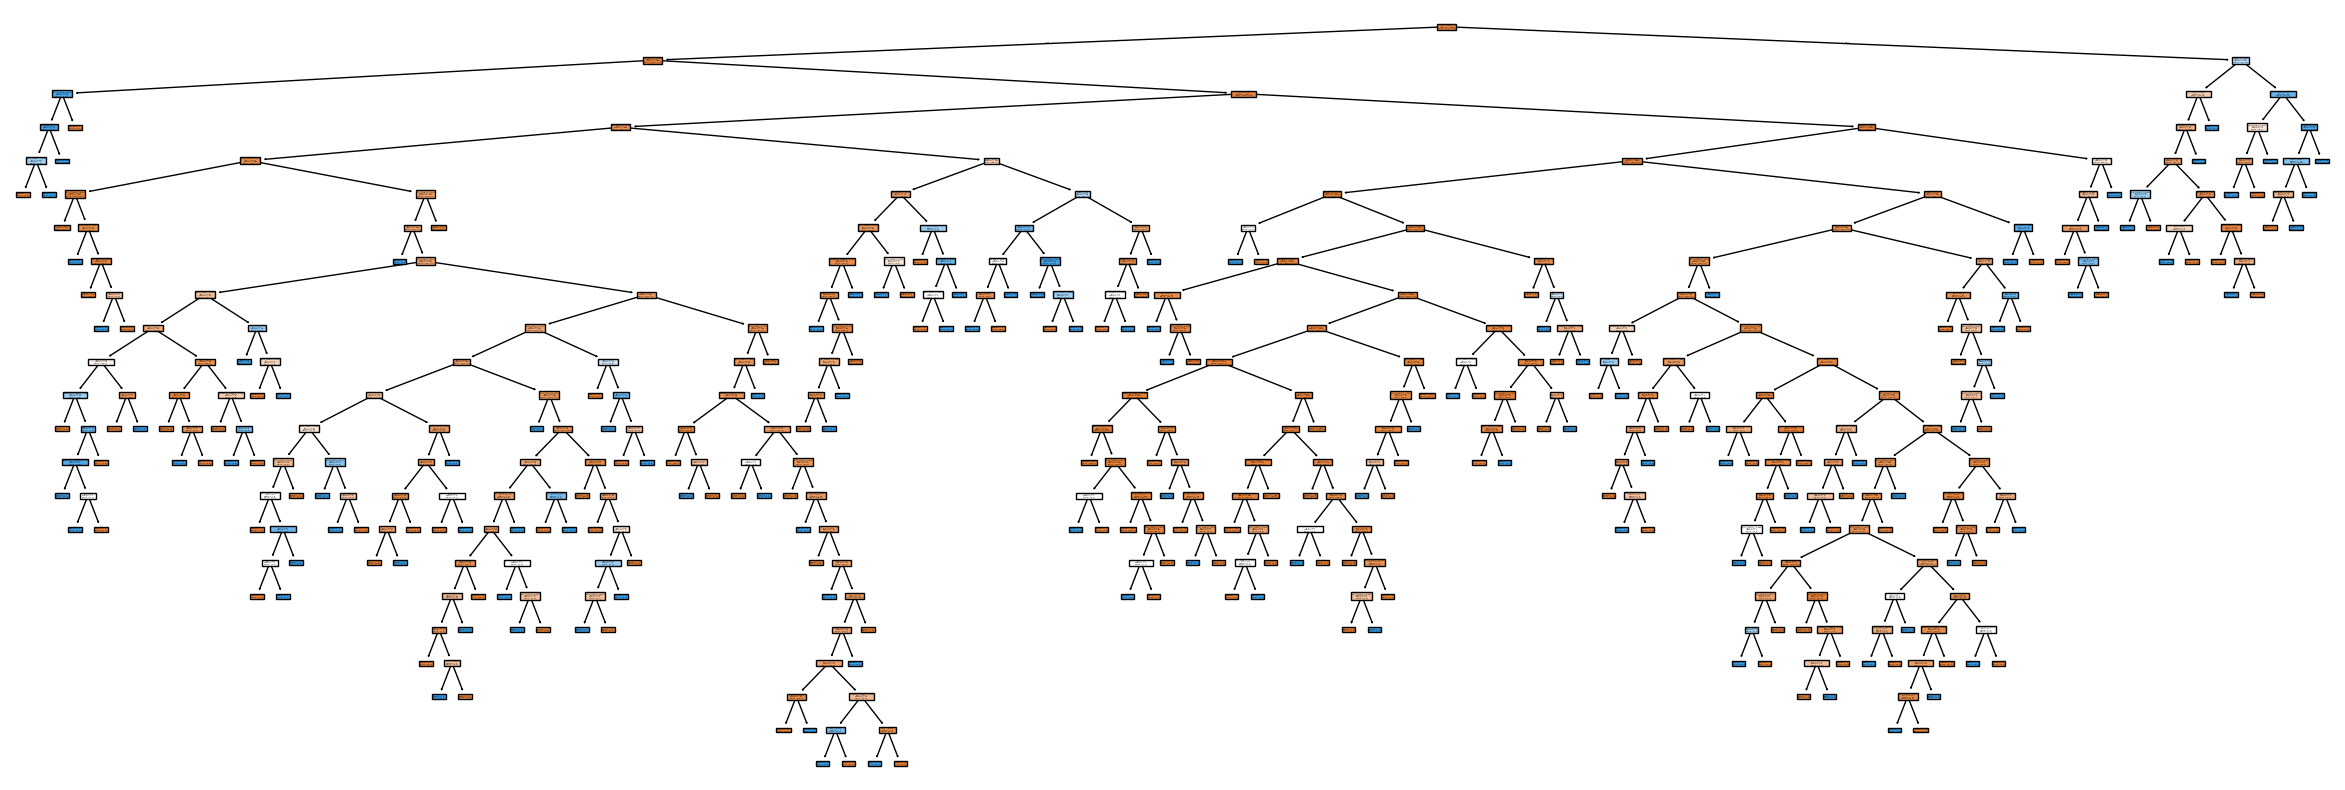

In [151]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(dt_model,feature_names = X.columns, filled =True)
plt.show()

## MODEL TUNNING

- Ater a model is been trained by baseline models and the performance is low, we go back to feature engineering and if still low, we perform model tunning


### CROSS VALIDATION

GRID SEARCH CROSS VALIDATION
- We have to train with a new model in this case, decision tree and you will also sate your parameters. the parameters will itereate through one after another, each iteration yeilding a model. The make scorer helps te model focus on a paticular metrics

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

#declare a new decision tree and next your parameters
model_grid = DecisionTreeClassifier()


parameters = {
    "criterion": ["gini","entropy"],
    "max_depth": [2,3],
    "min_samples_leaf" :[1,5,10]
}

acc = make_scorer(recall_score)

grid_obj = GridSearchCV(model_grid, parameters, cv=5,scoring=acc)# create an instance of the class but this time, passing arguments
grid_obj = grid_obj.fit(X,y)# train the model using gridsearch


when you use grid seasrchit tains the model with different combinations and output the result. to seect the best result, use the term best fit

In [165]:
pd.DataFrame(grid_obj.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020476,0.003198,0.014628,0.003408,gini,2,1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.194030,0.176471,0.102941,0.264706,0.205882,0.188806,0.052162,11
1,0.021242,0.003139,0.011331,0.003214,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.194030,0.176471,0.102941,0.264706,0.205882,0.188806,0.052162,11
2,0.016515,0.001414,0.009953,0.001188,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.194030,0.191176,0.102941,0.264706,0.205882,0.191747,0.051797,10
3,0.031064,0.007829,0.012670,0.005660,gini,3,1,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.298507,0.176471,0.102941,0.308824,0.352941,0.247937,0.093190,2
4,0.023066,0.001972,0.009476,0.001343,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.298507,0.176471,0.102941,0.308824,0.352941,0.247937,0.093190,2
5,0.023189,0.001475,0.009503,0.001446,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.208955,0.176471,0.102941,0.308824,0.352941,0.230026,0.090310,6
6,0.024557,0.006107,0.014504,0.005966,entropy,2,1,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.179104,0.220588,0.044118,0.264706,0.264706,0.194644,0.081719,7
7,0.017780,0.001671,0.009422,0.001942,entropy,2,5,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.179104,0.220588,0.044118,0.264706,0.264706,0.194644,0.081719,7
8,0.022809,0.005852,0.013467,0.004010,entropy,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.179104,0.220588,0.044118,0.264706,0.264706,0.194644,0.081719,7
9,0.023806,0.004472,0.011944,0.001972,entropy,3,1,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.343284,0.220588,0.132353,0.264706,0.235294,0.239245,0.068208,4


In [163]:
# get the best estimator and save in a variable
best=grid_obj.best_estimator_
best

DecisionTreeClassifier(criterion='entropy', max_depth=3)

- After using gridsearch to train the model, you should identify the best estimator( the best combination of parameters), after this, use that combinatiion to train the model again

In [155]:
# train your model with the best estimtor from your grid search CV
best.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [156]:
print("performance on Testing Dataset")
model_performance(best,X_test,y_test)

performance on Testing Dataset


,Accuracy,Recall,Precision,F1 Score
0,0.975,0.238095,0.882353,0.375


In [157]:
print("perfomance on Training Dataset")
model_performance(best,X_train,y_train)

perfomance on Training Dataset


,Accuracy,Recall,Precision,F1 Score
0,0.971875,0.235507,0.822785,0.366197


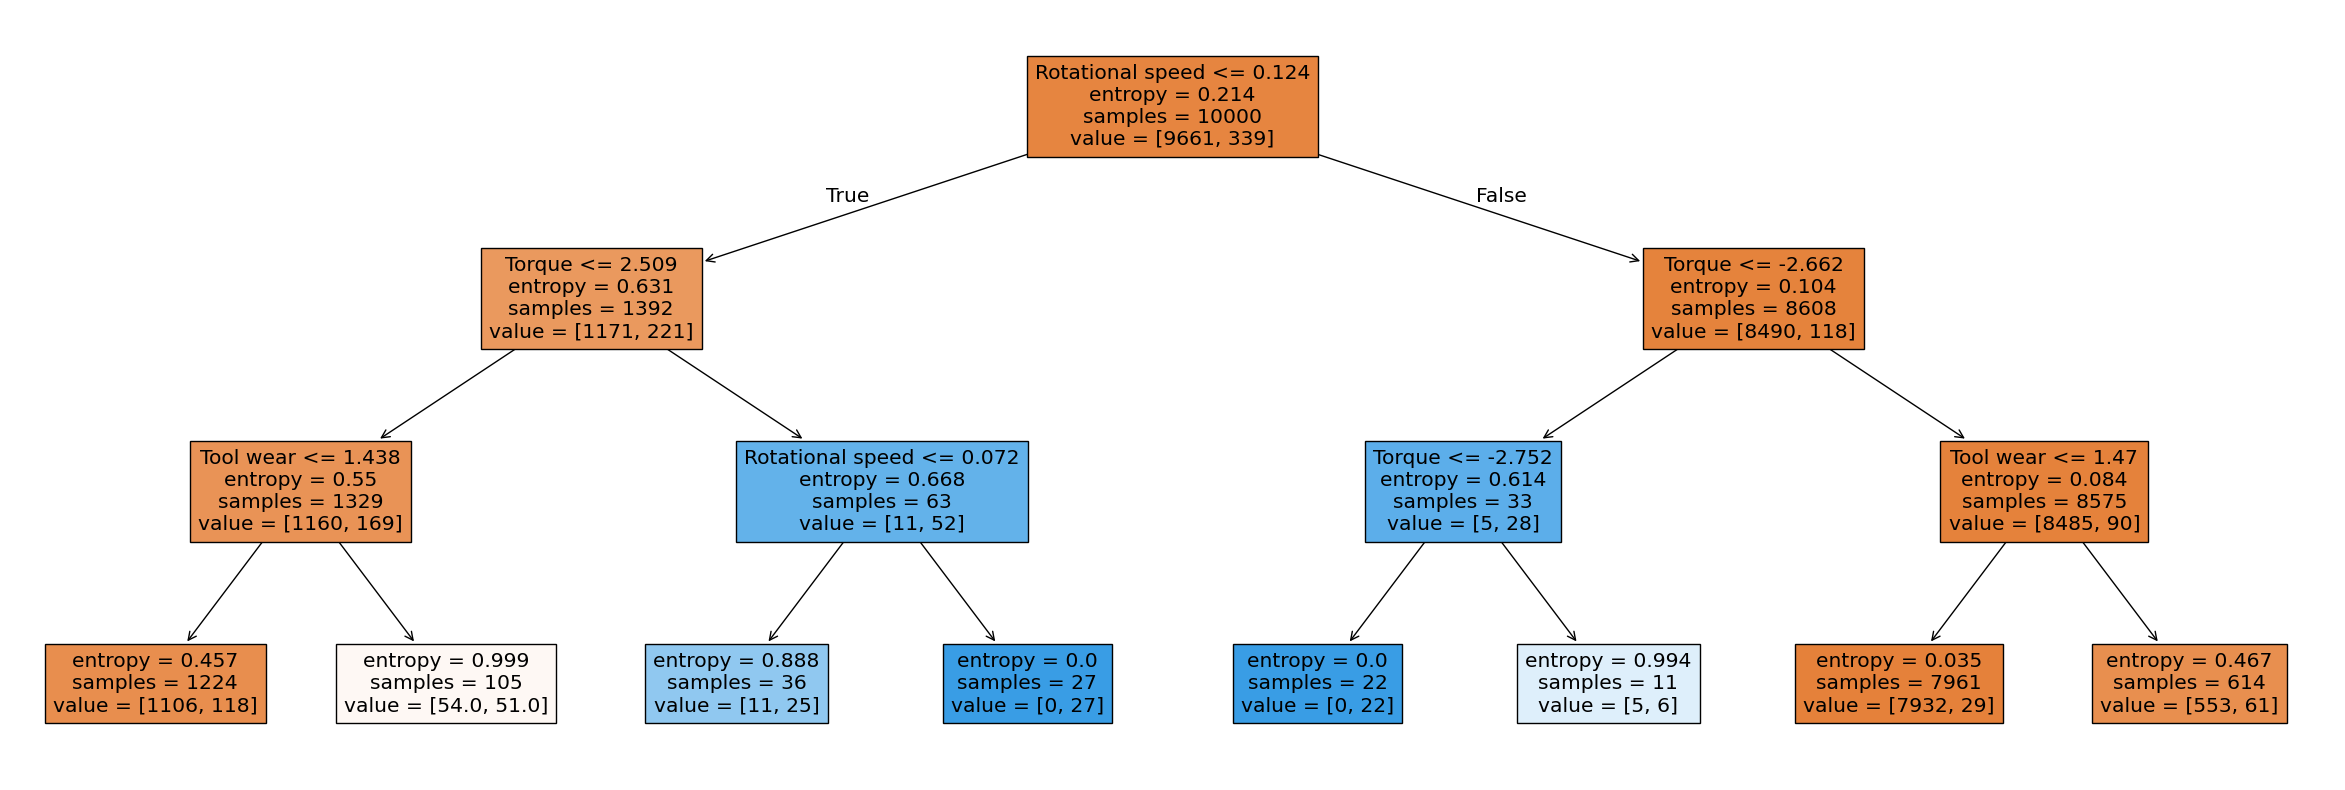

In [158]:
#build the tree
plt.figure(figsize=(30,10))
tree.plot_tree(best,feature_names = X.columns, filled =True)
plt.show()

#### FEATURE IMPORTANCE

how to know the most important features ffor affecting your model

In [159]:
importance = best.feature_importances_
importance

array([0.        , 0.42538518, 0.31676195, 0.25785288, 0.        ])

In [167]:
# arrange using np 
Index =np.argsort(importance) # argsort helps to arrange importance in acending or descending other

In [161]:
f_name = X.columns
f_name

Index(['Type', 'Rotational speed', 'Torque', 'Tool wear', 'total_temp'], dtype='object')

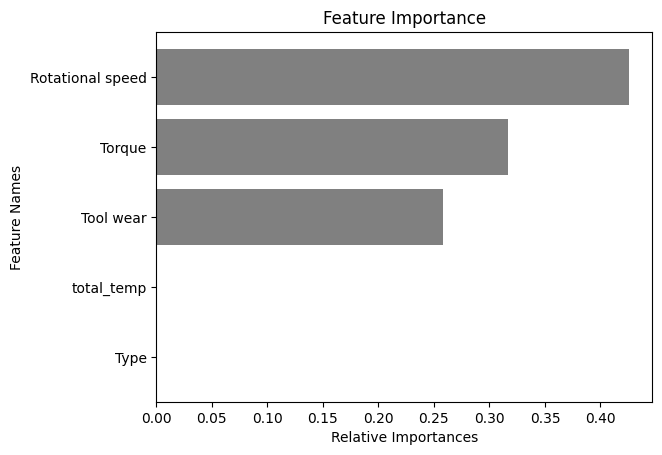

In [168]:
# To show the names of the individual feature, we will use for loop and declare yticks

plt.title("Feature Importance")
plt.barh(range(len(Index)),importance[Index],color="grey")
plt.yticks(range(len(Index)),[f_name[i] for i in Index])
plt.xlabel("Relative Importances")
plt.ylabel("Feature Names")
plt.show()

In [ ]:
plt.title("Feature Importance")
plt.barh(range(len(Index)),importance[Index],color="grey")
plt.xlabel("Relative Importances")
plt.ylabel("Feature Names")
plt.show()

## INSIGHT AND CONCLUSION

- The Random Forest classifier achieved high accuracy in predicting equipment failure.
- Key features influencing predictions include temperature, pressure, vibration, and torque.
- Predictive maintenance helps companies minimize downtime and optimize costs.